# Principal Component Analysis of Breast Cancer Data


###  Tonglu Dou，       2020-06-05

##  1 Introduction of PCA

###   1.1 What is PCA?

- Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line. The next best-fitting line can be similarly chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different individual dimensions of the data are uncorrelated. These basis vectors are called principal components, and several related procedures principal component analysis (PCA).
- A dimensionality reduction technique based upon linear algebra



###  1.2 The geometric meaning of PCA


In general, for example, there are n samples, and each sample has two variable values X1 and X2. The scatter plot of these n samples is like a strip. It can be seen from the figure that the n sample points are either along the X1 axis or the X2 axis direction, and the degree of dispersion can be quantitatively expressed by the variance of the observation variable X1 and the variance of X2, respectively.

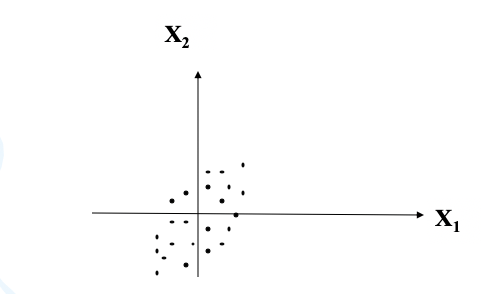

In [37]:
from IPython.display import Image
Image("/Users/lucydou/Documents/MATLAB/BIEN202/5.png")

Then, we rotate the X1 axis and the X2 axis simultaneously in a counterclockwise direction by an angle of θ to obtain new coordinate axes Y1 and Y2. Y1 and Y2 are two new variables. According to the coordinate rotation transformation formula in analytic geometry, we can get the following figure.

$$
Y_1 = X_1cosθ + X_2sinθ
$$
$$
Y_2 = -X_1sinθ + X_2cosθ
$$

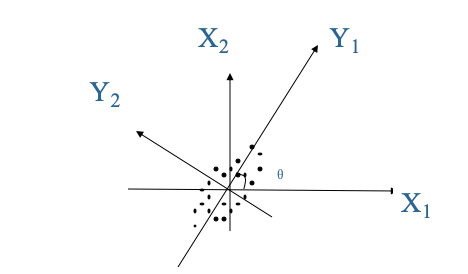

In [38]:
from IPython.display import Image
Image("/Users/lucydou/Documents/MATLAB/BIEN202/4.png")

###  1.3 PCA algorithm flow

###  (1) Input: Raw matrix data

$$
X = \left [
\begin{matrix}
x_{11} & ... & x_{1p} \\
... &  & ... \\
x_{n1} & ... & x_{np}
\end{matrix}
\right ] \tag{3-3}
$$

###  (2) Calculate sample covariance matrix

$$C = \frac{1}{m}XX^T$$

###  (3) Find the eigenvalues and corresponding eigenvectors of the covariance matrix


###  (4) Find the principal component

$$Y_1 = a_{11}X_1+a_{12}X_2+...+a_{1p}X_p$$
$$Y_2 = a_{21}X_1+a_{22}X_2+...+a_{2p}X_p$$
$$Y_p = a_{p1}X_1+a_{p2}X_2+...+a_{pp}X_p$$

###  (5) The eigenvectors are arranged in rows according to the corresponding eigenvalues from large to small, and the first k rows are taken to form a matrix K

- The eigenvalues are denoted as λi (i=1,2,…,p), which respectively represent the variance of the observed variables explained by the P principal components: Var(Yi)= λi (i=1,2,…,p)
- Principal component variance contribution rate
- In practical problems, the purpose of using principal components is to reduce the number of variables, so P principal components are generally not used, but the first K principal components are selected according to the following method.
- $$\alpha_i = \frac{\lambda_i}{\sum_{i=1}^p\lambda_i} \$$
- This is the variance contribution rate for the i-th principal component Yi. The larger the value, the stronger the ability of the principal component Yi to explain the original indicator information

##  2 Importing Libraries and Loading the Data

To import the dataset from the python library sci-kit learn.The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.The malignant class has 212 samples, whereas the benign class has 357 samples.It has 30 features shared across all classes: radius, texture,area, smoothness etc.

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer.keys()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

To print the features that are there in the breast cancer dataset.

In [41]:
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [42]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3 Data Visualization using PCA



As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first 2 principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance. It is a common practice to normalize the data before feeding it to any machine learning algorithm. While applying StandardScaler, each feature of the data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one. 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaled_data = scaler.transform(df)

## 3.1  Importing PCA

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


From the above output, we can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information, so  principal component 1 and  principal component 2 hold 63.2%  of the information in total. So that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.
    
Now we can transform this data to its first 2 principal components.

In [47]:
x_pca = pca.transform(scaled_data)

In [48]:
scaled_data.shape

(569, 30)

In [49]:
x_pca.shape

(569, 2)

## 3.2 Plotting figure

We've reduced 30 dimensions to just 2. To plot these 2 dimensions out.

Text(0.5, 1.0, 'Principal Component Analysis of Breast Cancer Dataset')

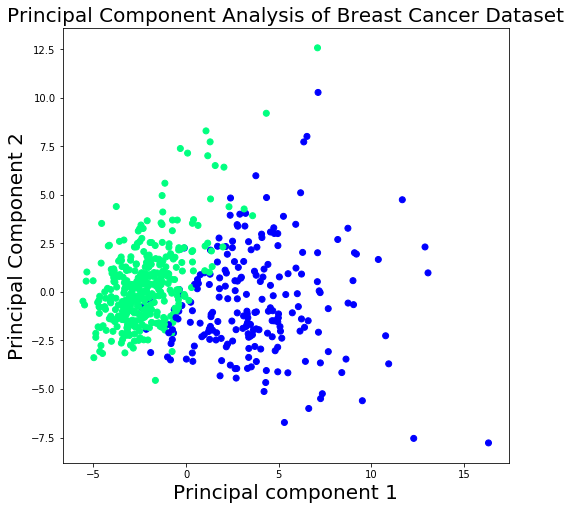

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='winter')
plt.xlabel('Principal component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

From the above figure, we can see that the two classes benign(blue) and malignant(green), when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

In [51]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

## 3.3 Plotting heatmap

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

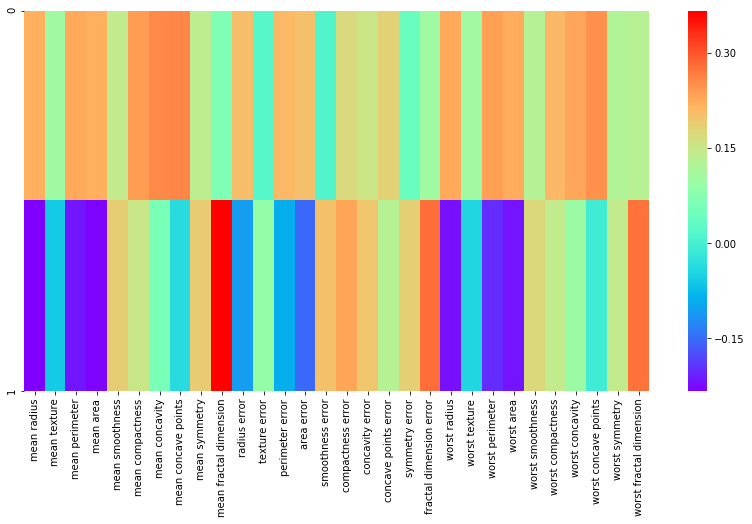

In [52]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(14,7))
sns.heatmap(df_comp,cmap='rainbow',)

## 4 Discussion

## 4.1 Regularization

From the heatmap, mean texture, texture error, and worst texture seem to have magnitudes near zero. Based on the weights for the principle components, I tried to drop these 3 variables.This is called “regularization”, we remove the variables that don’t contribute much to the overall model. 

In [53]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer.keys()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_drop = df.drop(columns=['mean texture', 'texture error','worst texture'])
df_drop.head()

,mean radius,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,fractal dimension error,worst radius,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.38,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.99,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.57,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.91,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.54,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_drop)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
scaled_data = scaler.transform(df_drop)

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
print(pca.explained_variance_ratio_)

[0.48256415 0.20829586]


From the above output, we can observe that the principal component 1 holds 48.26% of the information while the principal component 2 holds 20.83% of the information, so  principal component 1 and  principal component 2 hold 69.1% of the information in total which is higher than 63.2%. 

In [58]:
x_pca = pca.transform(scaled_data)

In [59]:
scaled_data.shape

(569, 27)

In [60]:
x_pca.shape

(569, 2)

The cumulative variance contribution rate has been improved, which can better reflect the information of the original data, but overlap of benign (blue) and malignant (green) scatter points also overlapped more, indicating that the degree of data separation became lower.

Text(0.5, 1.0, 'Principal Component Analysis of Breast Cancer Dataset')

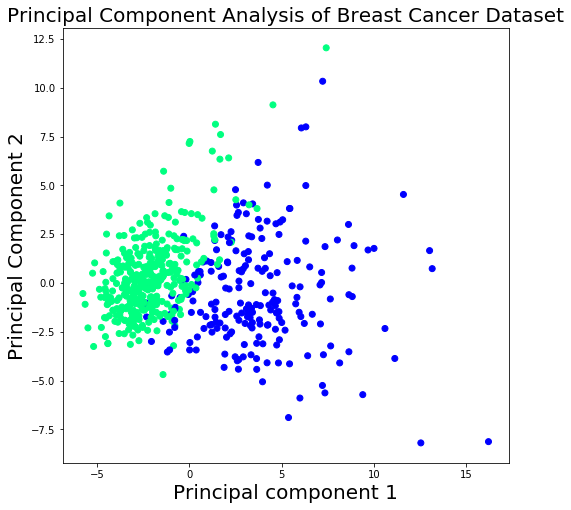

In [61]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='winter')
plt.xlabel('Principal component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

In [62]:
pca.components_

array([[ 0.22014815,  0.22898702,  0.22238264,  0.14734627,  0.24303835,
         0.2615217 ,  0.26403965,  0.14146484,  0.0681133 ,  0.20806194,
         0.21350084,  0.20496956,  0.01562917,  0.17319101,  0.1565874 ,
         0.18712746,  0.04436466,  0.10567724,  0.22882057,  0.23767812,
         0.22576049,  0.12995614,  0.21175714,  0.23062614,  0.25339168,
         0.12439709,  0.13375629],
       [-0.23855873, -0.21990048, -0.23691205,  0.1838606 ,  0.150724  ,
         0.05645055, -0.0394976 ,  0.18836735,  0.367256  , -0.11743424,
        -0.10120349, -0.162829  ,  0.19669763,  0.22884923,  0.19270736,
         0.12212395,  0.17476038,  0.27527691, -0.22308531, -0.2030604 ,
        -0.22359226,  0.17751943,  0.14933011,  0.10136592, -0.00733375,
         0.14830638,  0.28261344]])

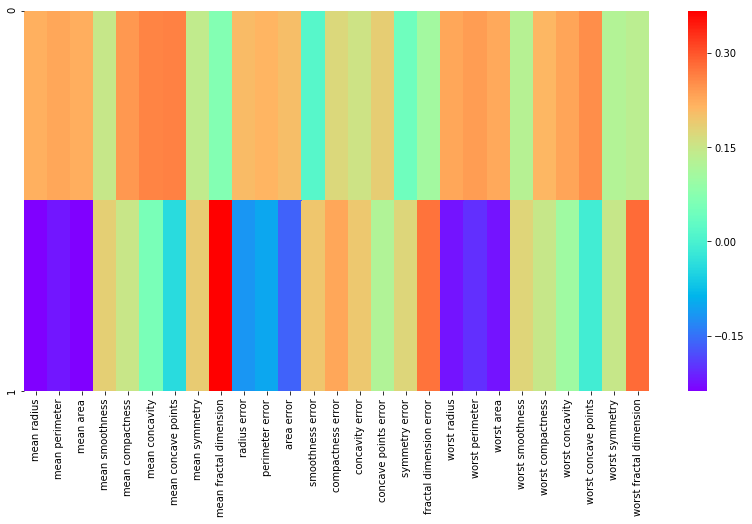

In [63]:
columns=cancer['feature_names'][~np.isin(cancer['feature_names'], np.array(['mean texture', 'texture error','worst texture']))]
df_comp = pd.DataFrame(pca.components_,columns=columns)
plt.figure(figsize=(14,7))
sns.heatmap(df_comp,cmap='rainbow',)

Through the above operations, we can reasonably infer that the three variables mean texture, texture error, and worst texture may not be independent of each other, but are positively related to each other. Therefore, after removing all three of them, it will not affect other variables Have too much impact

## 4.2 Add the third principle component

To calculate a third principle component, and show the scatter plots of the first PC vs the third PC,  the second PC vs the third PC, to see whether the third principle component helps or not.

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [65]:
print(pca.explained_variance_ratio_)

[0.48256415 0.20829586 0.0925471 ]


In [66]:
x_pca = pca.transform(scaled_data)

In [67]:
scaled_data.shape

(569, 27)

In [68]:
x_pca.shape

(569, 3)

Text(0.5, 1.0, 'Principal Component Analysis of Breast Cancer Dataset')

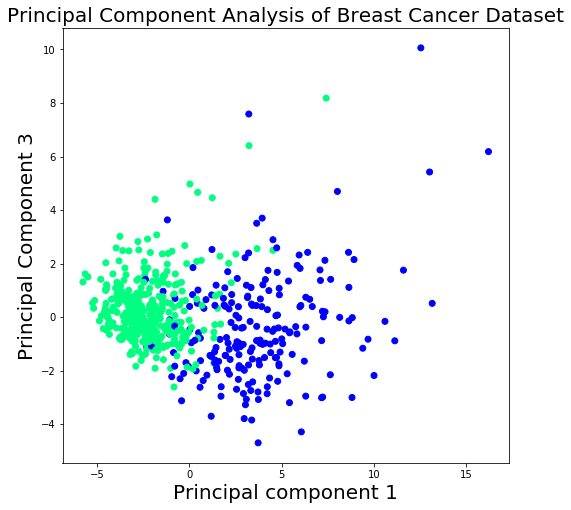

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,2],c=cancer['target'],cmap = 'winter')
plt.xlabel('Principal component 1',fontsize=20)
plt.ylabel('Principal Component 3',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

Text(0.5, 1.0, 'Principal Component Analysis of Breast Cancer Dataset')

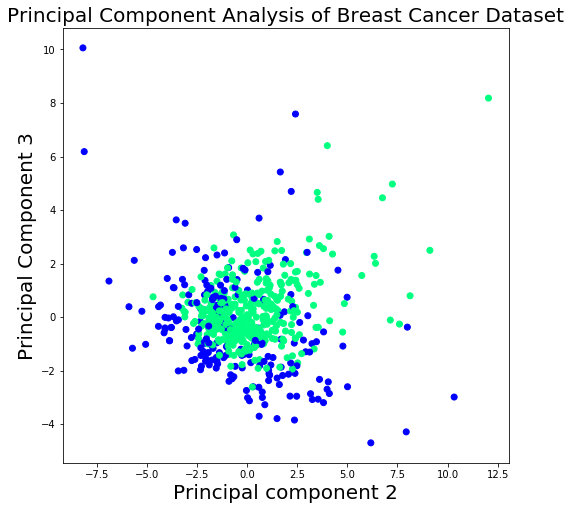

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,1],x_pca[:,2],c=cancer['target'],cmap = 'winter')
plt.xlabel('Principal component 2',fontsize=20)
plt.ylabel('Principal Component 3',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)

It can be seen that after the introduction of the third principal component, the scattered points overlap more and it is more difficult to separate the points of different types. So my opinion is that there is no need to introduce the third principal component.

As a dimensionality reduction method for unsupervised learning, PCA only needs eigenvalue decomposition to compress and denoise data. Therefore, it is widely used in actual scenarios.

## 4.3 Advantages
- It is only necessary to measure the amount of information by variance, and it is not affected by factors outside the data set.
- The calculation method is simple, and the main operation is eigenvalue decomposition, which is easy to implement.
 

## 4.4 Disadvantages

- The meaning of each feature dimension of the principal component has a certain degree of ambiguity, which is not as interpretable as the features of the original sample.
- Non-principal components with small variances may also contain important information about sample differences, and discarding due to dimensionality reduction may have an impact on subsequent data processing.

## Reference
- W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
- O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
- W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html(Acessed: 2020-06-03,23:38pm)
- https://matplotlib.org/2.0.1/users/colormaps.html(Acessed: 2020-06-03,23:39pm)
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html(Acessed: 2020-06-03,23:40pm)

In [36]:
conda env export > environment.yml


Note: you may need to restart the kernel to use updated packages.
